Import  libraries

In [ ]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

Fetch 'flightdata.csv' dataset from the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/flightdata.csv')
# dataset = pd.read_csv("flightdata.csv")
dataset = pd.DataFrame(dataset)
dataset.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


Data visulazation and analysis

In [ ]:
print(dataset.columns)
dataset.head()

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')


,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


Handling null values

In [ ]:
#finding the number of null values present in each attributes
dataset.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [ ]:
dataset['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

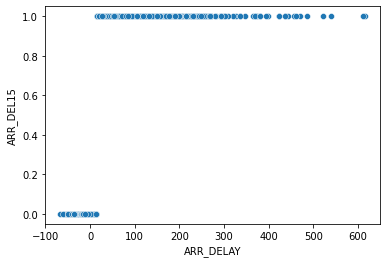

In [ ]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=dataset)

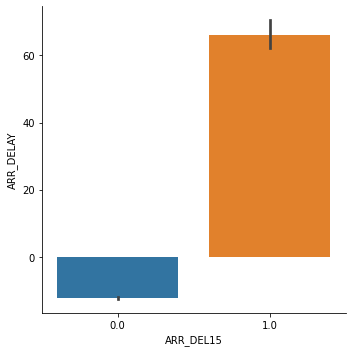

In [ ]:
#catplot shows frequencies (or optionally fractions or percents) of the categories of one, two or three categorical variables
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=dataset)

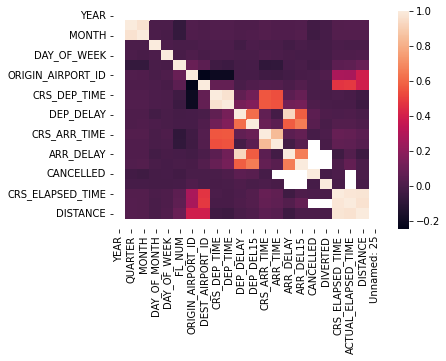

In [ ]:
# 1. Correlation is a statistical relationship between two variables and it could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease.
# 2. With the help of seaborn heatmap we will be plotting the heatmap and for finding the correlation between variables we have corr() available.
sns.heatmap(dataset.corr())

In [ ]:
dataset=dataset[["FL_NUM","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","DEST","CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
print(dataset.isnull().sum())

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64


Handling missing values in 'ARR_DEL15' and 'DEP_DEL15' features.

In [ ]:
dataset=dataset.fillna({'ARR_DEL15':1})
dataset=dataset.fillna({'DEP_DEL15':0})
dataset.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


Normalization or scaling the 'CRS_ARR_TIME' inorder to get the better accuracy.

In [ ]:
import math
for index,row in dataset.iterrows():
    dataset.loc[index,'CRS_ARR_TIME']=math.floor(row['CRS_ARR_TIME']/100)
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


ONE-HOT ENCODING on ORGIN and DEST features which has categorical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['DEST'] = le.fit_transform(dataset['DEST'])
dataset['ORIGIN']=le.fit_transform(dataset['ORIGIN'])
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x=dataset.values
z = oh.fit_transform(x[:,3:4]).toarray()
t=oh.fit_transform(x[:,4:5]).toarray()

In [ ]:
dataset.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


FEATURE IMPORTANCE by GINI IMPORTANCE TECHNIQUE.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


[0.14616543 0.06910485 0.16615687 0.07737319 0.04348852 0.04792183
 0.08348574 0.36630357]


Text(0.5, 0, 'Feature Importance')

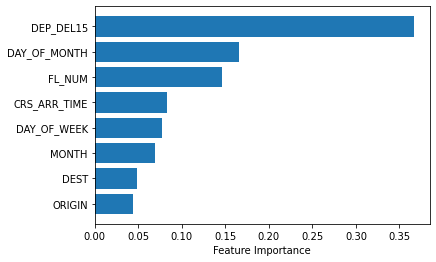

In [ ]:
from sklearn.ensemble import RandomForestRegressor  
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.fillna(999, inplace=True)

X = dataset.iloc[:, 0:8].values
Y = dataset.iloc[:, 8:9].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, Y_train)

sort = rf.feature_importances_.argsort()
print(rf.feature_importances_)
plt.barh(dataset.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 0.10007122507122507
Mean Squared Error: 0.10007122507122507
Root Mean Squared Error: 0.3163403626969298
Accuracy: 0.8999287749287749
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      2421
         1.0       0.68      0.52      0.59       387

    accuracy                           0.90      2808
   macro avg       0.80      0.74      0.77      2808
weighted avg       0.89      0.90      0.89      2808

[[2326   95]
 [ 186  201]]


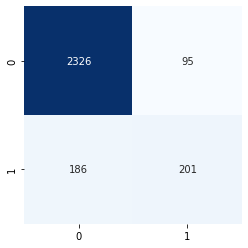

In [ ]:
forest_reg = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state = 42)
forest_reg.fit(X_train,Y_train)
model = forest_reg.fit(X_train , Y_train.ravel())
pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
#print("Report for test size = ", test_sz[i], "is shown below:")
print(classification_report(Y_test, pred))
matrix_confusion = confusion_matrix(y_true=Y_test, y_pred=pred)
print(matrix_confusion)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

SVM Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.0893874643874644
Mean Squared Error: 0.0893874643874644
Root Mean Squared Error: 0.2989773643396175
Accuracy: 0.9106125356125356
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      2421
         1.0       0.66      0.71      0.69       387

    accuracy                           0.91      2808
   macro avg       0.81      0.83      0.82      2808
weighted avg       0.91      0.91      0.91      2808

[[2282  139]
 [ 112  275]]


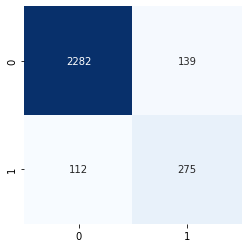

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)
pred = svc_model .predict(X_test)
#pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
#print("Report for test size = ", test_sz[i], "is shown below:")
print(classification_report(Y_test, pred))
matrix_confusion = confusion_matrix(y_true=Y_test, y_pred=pred)
print(matrix_confusion)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

Decision Tree

Mean Absolute Error: 0.1388888888888889
Mean Squared Error: 0.1388888888888889
Root Mean Squared Error: 0.37267799624996495
Accuracy: 0.8611111111111112
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      2421
         1.0       0.50      0.53      0.51       387

    accuracy                           0.86      2808
   macro avg       0.71      0.72      0.72      2808
weighted avg       0.87      0.86      0.86      2808

[[2213  208]
 [ 182  205]]


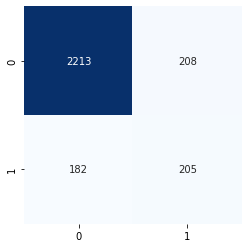

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
#print("Report for test size = ", test_sz[i], "is shown below:")
print(classification_report(Y_test, pred))
matrix_confusion = confusion_matrix(y_true=Y_test, y_pred=pred)
print(matrix_confusion)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 0.1014957264957265
Mean Squared Error: 0.1014957264957265
Root Mean Squared Error: 0.31858393948177377
Accuracy: 0.8985042735042735
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2421
         1.0       0.68      0.50      0.58       387

    accuracy                           0.90      2808
   macro avg       0.80      0.73      0.76      2808
weighted avg       0.89      0.90      0.89      2808

[[2330   91]
 [ 194  193]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


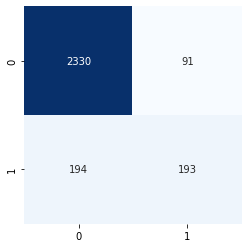

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
pred = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
#print("Report for test size = ", test_sz[i], "is shown below:")
print(classification_report(Y_test, pred))
matrix_confusion = confusion_matrix(y_true=Y_test, y_pred=pred)
print(matrix_confusion)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

Naive Bayes Classifier

Mean Absolute Error: 0.0893874643874644
Mean Squared Error: 0.0893874643874644
Root Mean Squared Error: 0.2989773643396175
Accuracy: 0.9106125356125356
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      2421
         1.0       0.66      0.71      0.69       387

    accuracy                           0.91      2808
   macro avg       0.81      0.83      0.82      2808
weighted avg       0.91      0.91      0.91      2808

[[2282  139]
 [ 112  275]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


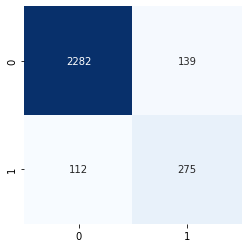

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred = gnb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
#print("Report for test size = ", test_sz[i], "is shown below:")
print(classification_report(Y_test, pred))
matrix_confusion = confusion_matrix(y_true=Y_test, y_pred=pred)
print(matrix_confusion)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

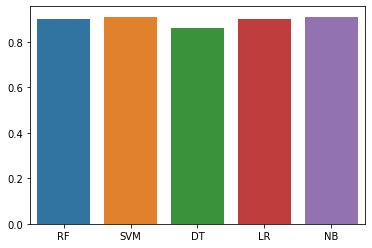

In [ ]:
import seaborn as sns
accuracies = [0.8999287749287749, 0.9106125356125356, 0.8611111111111112, 0.8985042735042735, 0.9106125356125356]
activities = ['RF', 'SVM', 'DT', 'LR', 'NB']
sns.barplot(y=accuracies, x=activities)